## http://yann.lecun.com/exdb/mnist/ 에서 손글씨 데이터 추출하기

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


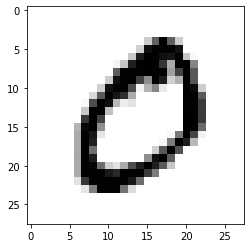

0


In [2]:
i=1

import matplotlib.pyplot as plt

plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()
print(train_labels[i])

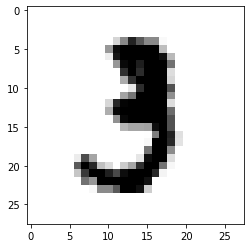

3


In [3]:
j=10

import matplotlib.pyplot as plt

plt.imshow(train_images[j], cmap=plt.cm.binary)
plt.show()
print(train_labels[j])

## 데이터를 학습에 맞도록 크기를 변환
- 1. $28\times 28 = 764$ 로 flatten 시켜준다.
- 2. 각 픽셀의 크기를 $0\le f \le 255$ 에서 $0\le f \le 1$로 크기를 조정해 준다.
- 3. label을 one-hot encoding 을 시켜준다. (해당값을 1로, 그 나머지를 0으로 변환)

In [4]:
from keras.utils import to_categorical

train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
print(train_labels[i])
print(train_labels[j])
print(train_images.shape)
print(train_labels.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(60000, 28, 28)
(60000, 10)


## Q2 : Hidden Layer가 3개인 Deep network 을 사용하여 학습시켜라.
- 1. 은닉층의 노드를 $(n_1, n_2, n_3) = (100, 50, 20) $ 개로 정한다.
- 2. learning_rate 를 적절히 조정한다.
- 3. 미니배치의 개수는 100으로 고정하고, 총 에포크는 10 번으로 반복시킨다. 
- 4. 각 은닉층의 활성화 함수는 ReLu 를 사용한다. 

In [6]:
from keras import models
from keras import layers


model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history= model.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2,validation_data=(test_images, test_labels))

Epoch 1/20
600/600 - 1s - loss: 0.3594 - accuracy: 0.8965 - val_loss: 0.1618 - val_accuracy: 0.9519
Epoch 2/20
600/600 - 1s - loss: 0.1434 - accuracy: 0.9586 - val_loss: 0.1189 - val_accuracy: 0.9644
Epoch 3/20
600/600 - 1s - loss: 0.1041 - accuracy: 0.9691 - val_loss: 0.1062 - val_accuracy: 0.9673
Epoch 4/20
600/600 - 1s - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0892 - val_accuracy: 0.9721
Epoch 5/20
600/600 - 1s - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0868 - val_accuracy: 0.9725
Epoch 6/20
600/600 - 1s - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 7/20
600/600 - 1s - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0851 - val_accuracy: 0.9732
Epoch 8/20
600/600 - 1s - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 9/20
600/600 - 1s - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.0857 - val_accuracy: 0.9761
Epoch 10/20
600/600 - 1s - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0919 - val_accuracy: 0.9738

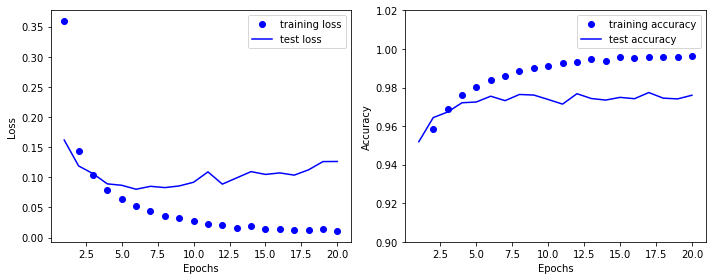

In [8]:
history_dict= history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test accuracy=',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9760
test accuracy= 0.9760000109672546


### 정보의 병목현상: 중간층의 노드개수를 최종 출력보다 노드개수보다 적게 만드는 경우

In [10]:
model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

test= model.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2, validation_data=(test_images, test_labels))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                40        
Total params: 83,743
Trainable params: 83,743
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
600/600 - 1s - loss: 1.5105 - accuracy: 0.4344 - val_loss: 1.1068 - val_accuracy: 0.5841
Epoch 2/20
600/6

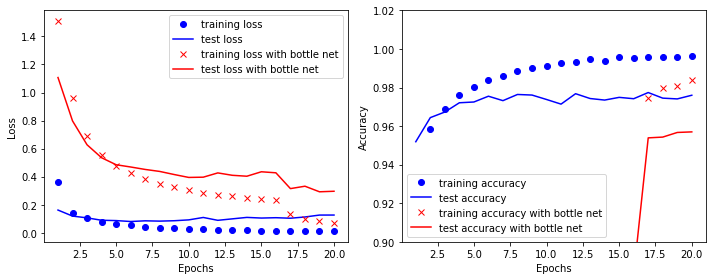

In [11]:
test_dict= test.history

loss2 = test_dict['loss']
val_loss2 = test_dict['val_loss']
accuracy2 = test_dict['accuracy']
val_accuracy2 = test_dict['val_accuracy']

epochs = range(1, len(loss2)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.plot(epochs, loss2, 'rx',label='training loss with bottle net')
plt.plot(epochs, val_loss2, 'r', label='test loss with bottle net')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.plot(epochs, accuracy2, 'rx',label='training accuracy with bottle net')
plt.plot(epochs, val_accuracy2, 'r', label='test accuracy with bottle net')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

### Weight Regularization : Over fitting 을 피하는 방법

In [12]:
from keras import regularizers

model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model.add(layers.Dense(100,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(50,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(20,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

test= model.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2, validation_data=(test_images, test_labels))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
600/600 - 1s - loss: 0.5917 - accuracy: 0.8780 - val_loss: 0.3601 - val_accuracy: 0.9439
Epoch 2/20
600/6

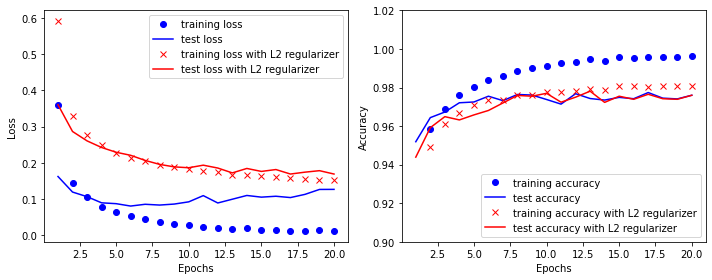

In [13]:
test_dict= test.history

test_dict= test.history

loss2 = test_dict['loss']
val_loss2 = test_dict['val_loss']
accuracy2 = test_dict['accuracy']
val_accuracy2 = test_dict['val_accuracy']


plt.figure(figsize=(10, 4))

plt.subplot(121)
 
plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.plot(epochs, loss2, 'rx',label='training loss with L2 regularizer')
plt.plot(epochs, val_loss2, 'r', label='test loss with L2 regularizer')

plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)
 
plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.plot(epochs, accuracy2, 'rx',label='training accuracy with L2 regularizer')
plt.plot(epochs, val_accuracy2, 'r', label='test accuracy with L2 regularizer')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

### Dropout : Over fitting 을 피하는 방법

In [14]:
model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

test2= model.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2,validation_data=(test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

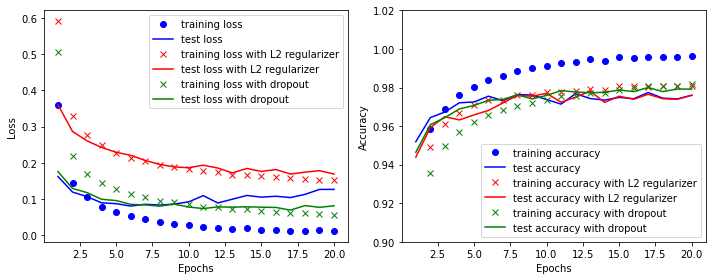

In [15]:
test2_dict= test2.history

loss3 = test2_dict['loss']
val_loss3 = test2_dict['val_loss']

accuracy3 = test2_dict['accuracy']
val_accuracy3 = test2_dict['val_accuracy']

epochs = range(1, len(loss3)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.plot(epochs, loss2, 'rx',label='training loss with L2 regularizer')
plt.plot(epochs, val_loss2, 'r', label='test loss with L2 regularizer')
plt.plot(epochs, loss3, 'gx',label='training loss with dropout')
plt.plot(epochs, val_loss3, 'g', label='test loss with dropout')

plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.plot(epochs, accuracy2, 'rx',label='training accuracy with L2 regularizer')
plt.plot(epochs, val_accuracy2, 'r', label='test accuracy with L2 regularizer')
plt.plot(epochs, accuracy3, 'gx',label='training accuracy with dropout')
plt.plot(epochs, val_accuracy3, 'g', label='test accuracy with dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()